# import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install koreanize-matplotlib
import koreanize_matplotlib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity

pd.set_option('display.max_columns', None)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 29.3 MB/s eta 0:00:00


In [ ]:
fin = pd.read_csv('/content/drive/MyDrive/최종프로젝트/final_enco_업권분류_파생변수.csv')

In [ ]:
fin.drop(columns=['Unnamed: 0'], inplace=True)
fin.head(2)

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권,보험계약건수,해지건수,만기건수,해지율,만기율,청구건수,계약유지율
0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,5.0,0.0,3.0,0.00,0.6,0.0,100.0
1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,4.0,3.0,0.0,0.75,0.0,0.0,100.0


In [ ]:
fin.shape

(57485, 69)

* 업권 분류

In [ ]:
fin['업권'].value_counts()

업권
1    32060
2    21566
0     3859
Name: count, dtype: int64

# 손보, 보험금 지급 건만

In [ ]:
fin_not0 = fin[fin['총지급 건수'] != 0]

fin_1 = fin_not0[fin_not0['업권'] == 1].reset_index(drop=True)
fin_1

,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권,보험계약건수,해지건수,만기건수,해지율,만기율,청구건수,계약유지율
0,797509,9351218,1,3,3,1,2,60,2,20,59.0,1,1,1,1,190,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,2.0,1.0,2.0,0.50,1.00,1.0,100.0
1,305755,9817732,2,5,3,1,6,37,2,20,37.0,1,1,1,0,4907,13,0,0,0,0,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,14.0,7.0,2.0,0.50,0.14,5.0,100.0
2,1276659,3120785,2,4,2,1,3,85,2,20,85.0,1,1,1,0,1160,2,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1.0,0.0,0.0,0.00,0.00,2.0,100.0
3,818304,5686072,1,4,2,1,1,120,2,63,120.0,1,1,1,1,989,9,0,0,0,0,9,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,5.0,2.0,0.0,0.40,0.00,6.0,100.0
4,1557600,6319159,2,2,3,1,99,69,2,20,65.0,1,1,1,0,434,5,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,8.0,0.0,1.0,0.00,0.12,4.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,466722,8793662,1,3,6,4,1,370,1,0,370.0,1,0,0,0,1390,2,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,3.0,1.0,0.0,0.33,0.00,2.0,100.0
4448,609264,927552,1,4,6,4,2,1000,1,0,1000.0,1,0,0,0,141,2,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,4.0,0.0,0.0,0.00,0.00,2.0,100.0
4449,620311,1638299,1,2,6,4,7,320,1,0,320.0,1,0,0,1,53,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,2.0,0.0,0.0,0.00,0.00,2.0,100.0
4450,665488,1893752,1,4,6,1,1,860,1,0,910.0,1,0,0,0,150,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,8.0,0.0,1.0,0.00,0.12,3.0,100.0


## 사용 컬럼

In [ ]:
fin_1.columns

Index(['JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP', 'reduce_GBN_CD',
       'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT', 'CT_PY_CYCLE_CD',
       'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3', '연령대_4', '연령대_5', '연령대_6',
       '연령대_7', '연령대_8', '보험종류_1', '보험종류_2', '보험종류_3', '보험종류_4', '보험종류_5',
       '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9', '보험상태_1', '보험상태_2', '보험상태_3',
       '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4', '채널_5', '채널_6', '채널_7',
       '채널_99', '납입주기_1', '납입주기_2', '납입주기_3', '납입주기_99', '성별_1', '성별_2', '업권',
       '보험계약건수', '해지건수', '만기건수', '해지율', '만기율', '청구건수', '계약유지율'],
      dtype='object')

In [ ]:
fin_1_use_col = fin_1[['GENDER', 'AGE_GROUP', 'reduce_GBN_CD',
       'CT_CHNL_CD', 'CT_PY_CYCLE_CD',
       'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물',
       '보험계약건수', '해지율', '만기율', '청구건수', '계약유지율']]

In [ ]:
fin_1_use_col

,GENDER,AGE_GROUP,reduce_GBN_CD,CT_CHNL_CD,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,보험계약건수,해지율,만기율,청구건수,계약유지율
0,1,3,3,2,2,20,59.0,1,1,1,1,190,1,0,0,0,0,1,0,0,0,2.0,0.50,1.00,1.0,100.0
1,2,5,3,6,2,20,37.0,1,1,1,0,4907,13,0,0,0,0,13,0,0,0,14.0,0.50,0.14,5.0,100.0
2,2,4,2,3,2,20,85.0,1,1,1,0,1160,2,0,0,0,0,2,0,0,0,1.0,0.00,0.00,2.0,100.0
3,1,4,2,1,2,63,120.0,1,1,1,1,989,9,0,0,0,0,9,0,0,0,5.0,0.40,0.00,6.0,100.0
4,2,2,3,99,2,20,65.0,1,1,1,0,434,5,0,0,0,0,5,0,0,0,8.0,0.00,0.12,4.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,1,3,6,1,1,0,370.0,1,0,0,0,1390,2,0,0,0,0,2,0,0,0,3.0,0.33,0.00,2.0,100.0
4448,1,4,6,2,1,0,1000.0,1,0,0,0,141,2,0,0,0,0,2,0,0,0,4.0,0.00,0.00,2.0,100.0
4449,1,2,6,7,1,0,320.0,1,0,0,1,53,1,0,0,0,0,1,0,0,0,2.0,0.00,0.00,2.0,100.0
4450,1,4,6,1,1,0,910.0,1,0,0,0,150,1,0,0,0,0,1,0,0,0,8.0,0.00,0.12,3.0,100.0


## 코사인 유사도, k-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


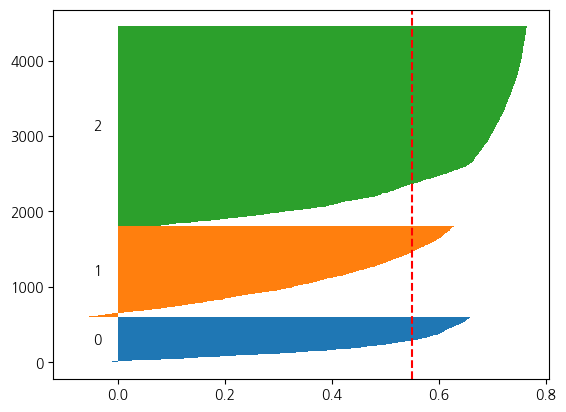

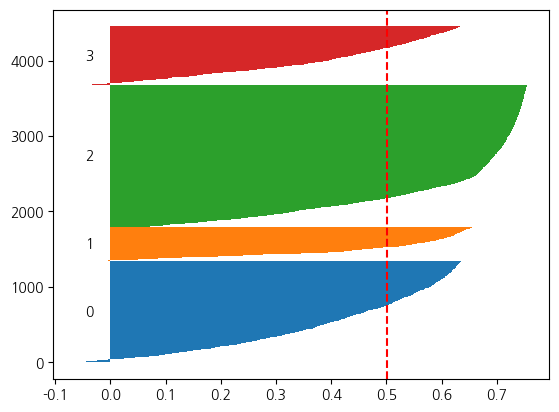

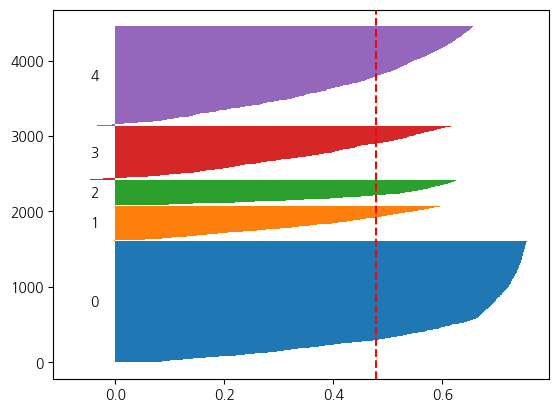

In [ ]:
cosine_sim_1 = cosine_similarity(fin_1_use_col)

for k in range(3, 6):
    fig, ax = plt.subplots(1, 1)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_1)
    silhouette_vals = silhouette_samples(cosine_sim_1, kmeans.labels_)
    y_ticks = []
    y_lower = y_upper = 0

    for c_num in np.unique(kmeans.labels_):
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort()

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
        y_lower += len(cluster_silhouette_vals)

    ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

In [ ]:
fin_1_use_col

,GENDER,AGE_GROUP,reduce_GBN_CD,CT_CHNL_CD,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,보험계약건수,해지율,만기율,청구건수,계약유지율
0,1,3,3,2,2,20,59.0,1,1,1,1,190,1,0,0,0,0,1,0,0,0,2.0,0.50,1.00,1.0,100.0
1,2,5,3,6,2,20,37.0,1,1,1,0,4907,13,0,0,0,0,13,0,0,0,14.0,0.50,0.14,5.0,100.0
2,2,4,2,3,2,20,85.0,1,1,1,0,1160,2,0,0,0,0,2,0,0,0,1.0,0.00,0.00,2.0,100.0
3,1,4,2,1,2,63,120.0,1,1,1,1,989,9,0,0,0,0,9,0,0,0,5.0,0.40,0.00,6.0,100.0
4,2,2,3,99,2,20,65.0,1,1,1,0,434,5,0,0,0,0,5,0,0,0,8.0,0.00,0.12,4.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,1,3,6,1,1,0,370.0,1,0,0,0,1390,2,0,0,0,0,2,0,0,0,3.0,0.33,0.00,2.0,100.0
4448,1,4,6,2,1,0,1000.0,1,0,0,0,141,2,0,0,0,0,2,0,0,0,4.0,0.00,0.00,2.0,100.0
4449,1,2,6,7,1,0,320.0,1,0,0,1,53,1,0,0,0,0,1,0,0,0,2.0,0.00,0.00,2.0,100.0
4450,1,4,6,1,1,0,910.0,1,0,0,0,150,1,0,0,0,0,1,0,0,0,8.0,0.00,0.12,3.0,100.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


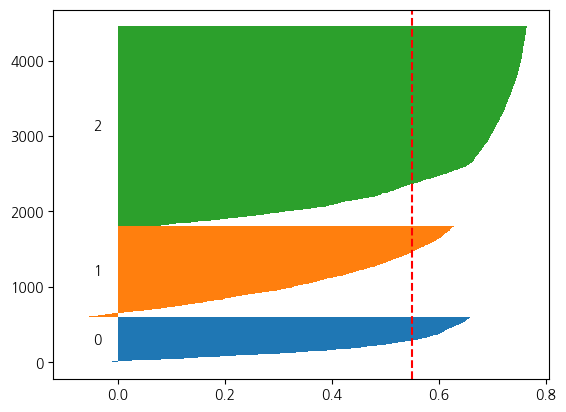

In [ ]:
cosine_sim__1 = cosine_similarity(fin_1_use_col)

k=3

fig, ax = plt.subplots(1, 1)
kmeans_0_1 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim__1)
silhouette_vals = silhouette_samples(cosine_sim__1, kmeans_0_1.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_0_1.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_0_1.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)

ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

In [ ]:
fin_1_use_col['코사인군집'] = kmeans_0_1.labels_
fin_1_use_col.head()

<ipython-input-13-74b074a34a80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_1_use_col['코사인군집'] = kmeans_0_1.labels_


,GENDER,AGE_GROUP,reduce_GBN_CD,CT_CHNL_CD,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,보험계약건수,해지율,만기율,청구건수,계약유지율,코사인군집
0,1,3,3,2,2,20,59.0,1,1,1,1,190,1,0,0,0,0,1,0,0,0,2.0,0.5,1.00,1.0,100.0,1
1,2,5,3,6,2,20,37.0,1,1,1,0,4907,13,0,0,0,0,13,0,0,0,14.0,0.5,0.14,5.0,100.0,2
2,2,4,2,3,2,20,85.0,1,1,1,0,1160,2,0,0,0,0,2,0,0,0,1.0,0.0,0.00,2.0,100.0,2
3,1,4,2,1,2,63,120.0,1,1,1,1,989,9,0,0,0,0,9,0,0,0,5.0,0.4,0.00,6.0,100.0,2
4,2,2,3,99,2,20,65.0,1,1,1,0,434,5,0,0,0,0,5,0,0,0,8.0,0.0,0.12,4.0,100.0,2


In [ ]:
fin_1_use_col.agg(['count', 'size', 'nunique'])

,GENDER,AGE_GROUP,reduce_GBN_CD,CT_CHNL_CD,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,보험계약건수,해지율,만기율,청구건수,계약유지율,코사인군집
count,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452
size,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452,4452
nunique,2,9,9,8,3,86,501,2,2,2,2,1288,29,7,3,3,10,28,2,5,3,22,76,67,13,169,3


In [ ]:
fin_1_use_col['코사인군집'].value_counts()

코사인군집
2    2647
1    1202
0     603
Name: count, dtype: int64

## 파일 내보내기

In [ ]:
fin_1_use_col.to_csv('손보_보험금지급건_군집화.csv', index=False, encoding='utf-8-sig')

## RF - feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

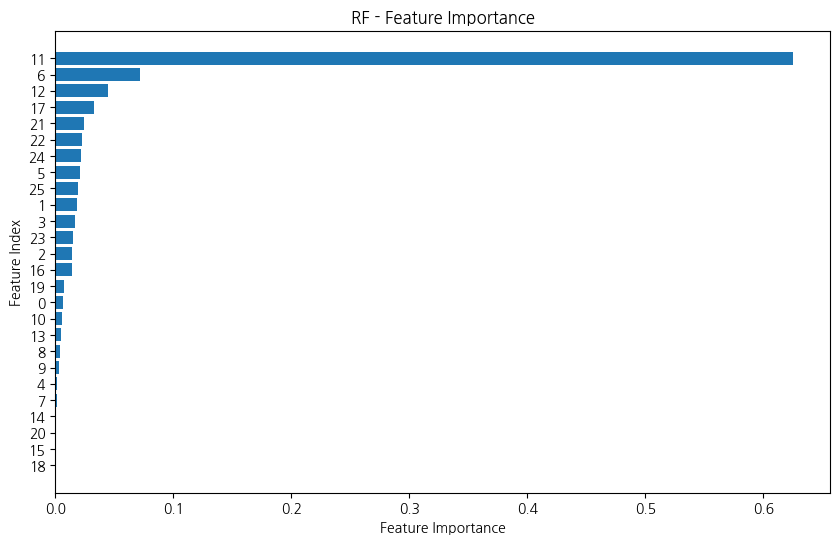

In [ ]:
model_rf = RandomForestClassifier()

X_features = ['GENDER', 'AGE_GROUP', 'reduce_GBN_CD',
       'CT_CHNL_CD', 'CT_PY_CYCLE_CD',
       'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2', 'GBN_CD_3', 'GBN_CD_4',
       '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원', '실손', '자동차', '진단/통원',
       '화재/재물',
       '보험계약건수', '해지율', '만기율', '청구건수', '계약유지율']

x = fin_1_use_col[X_features]
y = fin_1_use_col['코사인군집']

model_rf.fit(x, y)

# 특성 중요도 추출
feature_importance = model_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(range(x.shape[1]))[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('RF - Feature Importance')
plt.show()

* 11 : 총지급금액
* 6 : mean_AMT
* 12 : 총지급건수
* 17 : 실손

## 다중 로지스틱 회귀

### 1. 총지급금액, mean_AMT

In [ ]:
X = fin_1_use_col[['총지급금액', 'mean_AMT']]
y = fin_1_use_col['코사인군집']

model_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_logistic.fit(X, y)

acc_X = model_logistic.score(X, y)

# 학습된 모델의 계수 확인
lor_coef = model_logistic.coef_[0]
lor_intercept = model_logistic.intercept_

# 변수 지정
w1_lor = lor_coef[0].round(2)
w2_lor = lor_coef[1].round(2)
bias_lor = lor_intercept[0].round(2)

print(w1_lor, w2_lor, bias_lor)
print("총지급금액 *", w1_lor, "+", "mean_AMT *", w2_lor, "+", bias_lor)
print("정확도:", acc_X)

-0.11 0.07 6.31
총지급금액 * -0.11 + mean_AMT * 0.07 + 6.31
정확도: 0.9514824797843666


### 2. 총지급금액, mean_AMT, 총지급 건수

In [ ]:
X = fin_1_use_col[['총지급금액', 'mean_AMT', '총지급 건수']]
y = fin_1_use_col['코사인군집']

model_logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_logistic.fit(X, y)

acc_X = model_logistic.score(X, y)

# 학습된 모델의 계수 확인
lor_coef = model_logistic.coef_[0]
lor_intercept = model_logistic.intercept_

# 변수 지정
w1_lor = lor_coef[0].round(2)
w2_lor = lor_coef[1].round(2)
w3_lor = lor_coef[2].round(2)
bias_lor = lor_intercept[0].round(2)

print(w1_lor, w2_lor, w3_lor, bias_lor)
print("총지급금액 *", w1_lor, "+", "mean_AMT *", w2_lor, "+", "총지급건 *", w3_lor, "+", bias_lor)
print("정확도:", acc_X)

-0.11 0.07 0.34 5.71
총지급금액 * -0.11 + mean_AMT * 0.07 + 총지급건 * 0.34 + 5.71
정확도: 0.9526055705300989


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
